In [81]:
import numpy as np
import pandas as pd

In [86]:
df=pd.read_csv('spam.csv')
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'Email spam classifier\\spam.csv'

In [84]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [85]:
#data-cleaning phase
df.shape

(5576, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5576 non-null   object
 1   v2          5576 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.shape

(5576, 2)

In [8]:
df.sample(10)

,v1,v2
106,ham,"Aight, I'll hit you up when I get some cash"
527,ham,Yes! How is a pretty lady like you single?
1835,ham,* Will be september by then!
4952,ham,I lost 4 pounds since my doc visit last week w...
3715,ham,Networking technical support associate.
4938,ham,Tomarrow i want to got to court. At &lt;DECIM...
699,ham,K..u also dont msg or reply to his msg..
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th..."
1594,ham,Never blame a day in ur life. Good days give u...
1151,ham,"Sorry, I'll call later"


In [9]:
df.rename(columns={'v1':'output','v2':'message'},inplace=True)
df.sample(10)

,output,message
4963,spam,Dear Voucher holder Have your next meal on us....
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g..."
634,spam,"Dear Voucher Holder, 2 claim this weeks offer,..."
4351,ham,Hows the pain dear?y r u smiling?
2765,ham,and picking them up from various points
4083,ham,Quite ok but a bit ex... U better go eat smth ...
641,ham,"said kiss, kiss, i can't do the sound effects..."
3574,ham,And do you have any one that can teach me how ...
363,ham,Busy here. Trying to finish for new year. I am...
5020,ham,:-( sad puppy noise


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['output'] = encoder.fit_transform(df['output'])

In [12]:
df.head()

,output,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

output     0
message    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [16]:
#eda-phase
df.head()

,output,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['output'].value_counts()

output
0    4517
1     656
Name: count, dtype: int64

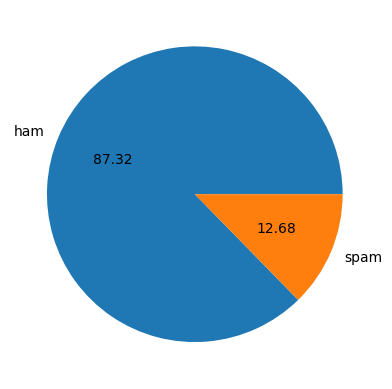

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['output'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['no_characters'] = df['message'].apply(len)

df.head()

,output,message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#number of words
df['no_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,output,message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#number of sentences
df['no_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,output,message,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['no_characters','no_words','no_sentences']].describe()


,no_characters,no_words,no_sentences
count,5173.000000,5173.000000,5173.000000
mean,78.931181,18.445003,1.964817
std,58.240809,13.325667,1.448230
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#ham
df[df['output']==0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4517.000000,4517.000000,4517.000000
mean,70.445871,17.120434,1.820013
std,56.360290,13.494352,1.383558
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam
df[df['output']==1][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,656.000000,656.000000,656.000000
mean,137.358232,27.565549,2.961890
std,31.105848,7.158317,1.490964
min,8.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.500000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_words', ylabel='Count'>

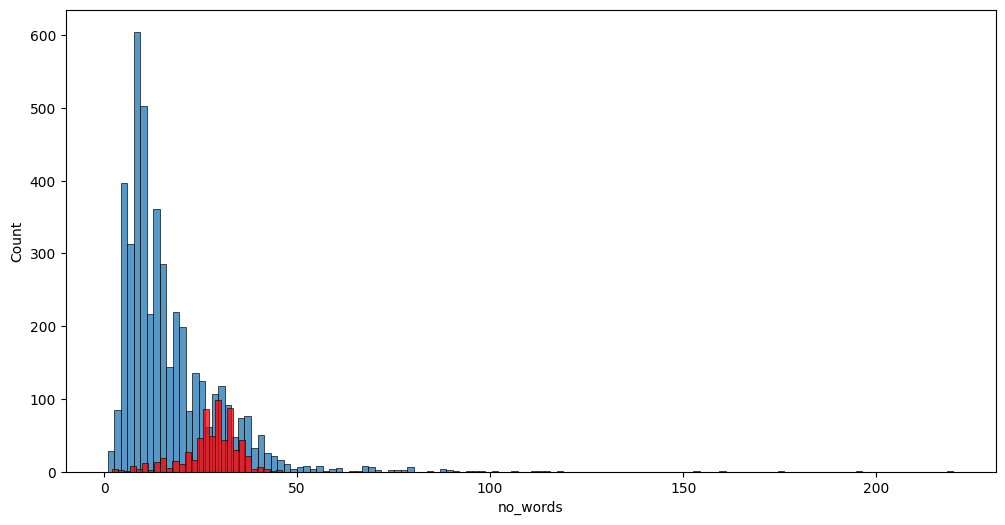

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['output'] == 0]['no_words'])
sns.histplot(df[df['output'] == 1]['no_words'],color='red')

<Axes: xlabel='no_characters', ylabel='Count'>

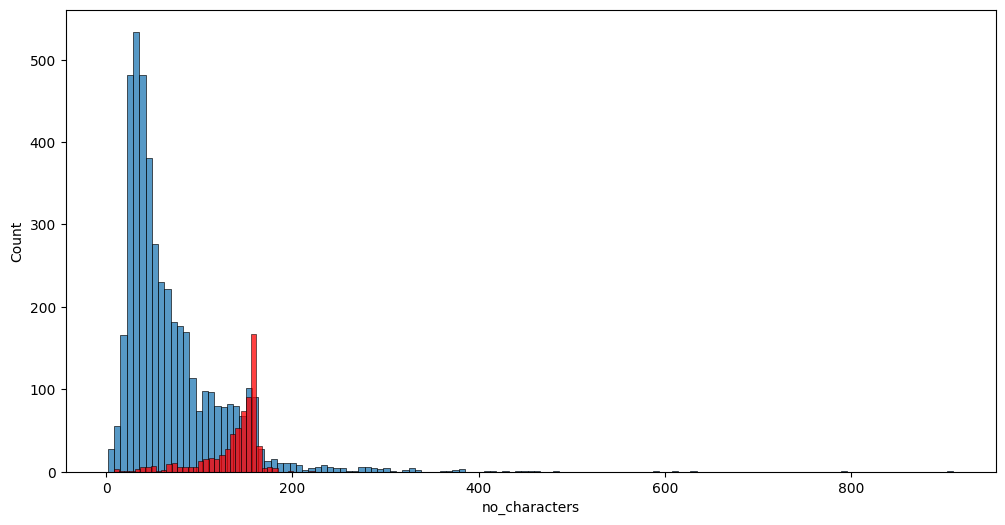

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['output'] == 0]['no_characters'])
sns.histplot(df[df['output'] == 1]['no_characters'],color='red')

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


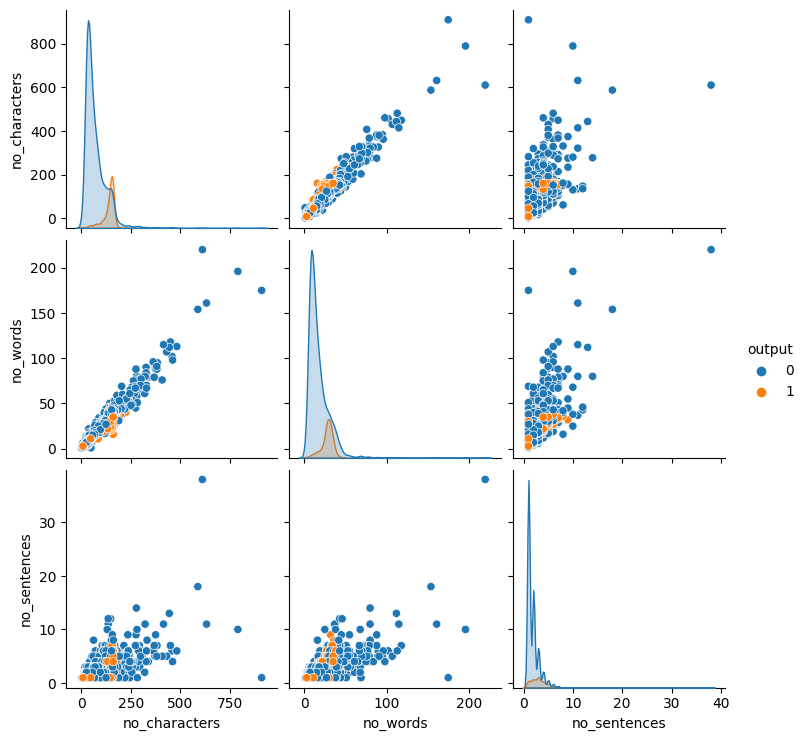

In [28]:
sns.pairplot(df,hue='output')

#data-preprocessing phase
1.converting to lower case
2.tokenization
3.remove special charecters
4.removing stop words(of,is....) and punctuation
5.stemming(removing words which have two possible meanings )

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(str):
    str=str.lower()
    print(str)
    str=nltk.word_tokenize(str)
    print(str)
    y=[]
    for i in str:
        if(i.isalnum()):
            y.append(i)
    str=y[:]
    y.clear()
    for j in str:
        if j not in stopwords.words('english') and j not in string.punctuation:
            y.append(j)
    str=y[:]
    y.clear()
    for i in str:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [32]:
df['text']=df['message'].apply(transform_text)

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
ok lar... joking wif u oni...
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
u dun say so early hor... u c already then say...
['u', 'dun', 'say', 'so', 'early', 'hor', '...', 'u', 'c', 'already', 'then', 'say', '...']
nah i don't think he goes to usf, he live

In [33]:
df.sample(10)

,output,message,no_characters,no_words,no_sentences,text
873,0,Ugh its been a long day. I'm exhausted. Just w...,77,20,3,ugh long day exhaust want cuddl take nap
3115,0,Uncle Abbey! Happy New Year. Abiola,35,8,3,uncl abbey happi new year abiola
656,0,Sun cant come to earth but send luv as rays. c...,157,40,3,sun cant come earth send luv ray cloud cant co...
2664,0,He remains a bro amongst bros,29,6,1,remain bro amongst bro
233,0,Yes:)here tv is always available in work place..,48,12,1,ye tv alway avail work place
5145,0,Aiyar u so poor thing... I give u my support k...,77,22,3,aiyar u poor thing give u support k jia think u
417,1,FREE entry into our å£250 weekly competition j...,107,21,2,free entri weekli competit text word win 80086...
2552,0,"Oh fine, I'll be by tonight",27,8,1,oh fine tonight
2239,0,Every day i use to sleep after &lt;#&gt; so ...,51,17,1,everi day use sleep lt gt
3511,0,Already one guy loving you:-.,29,8,1,alreadi one guy love


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['output'] == 1]['text'].str.cat(sep=" "))

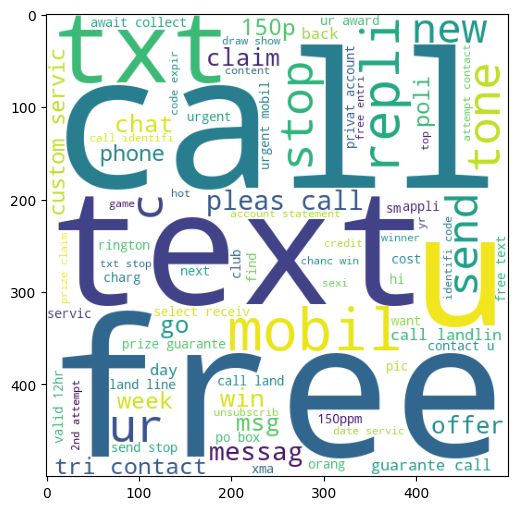

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

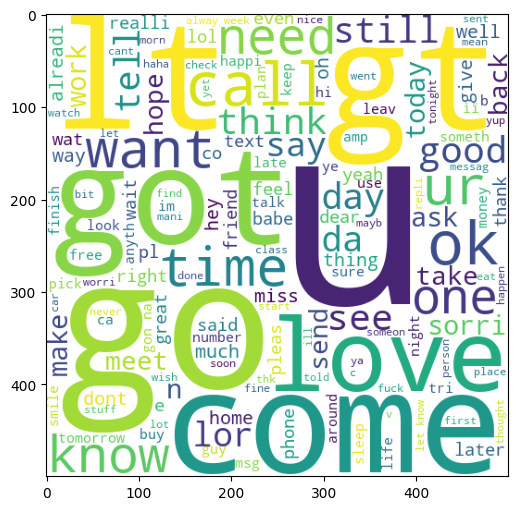

In [36]:
ham_wc = wc.generate(df[df['output'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [37]:
df.head()

,output,message,no_characters,no_words,no_sentences,text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
spam_corpus =[]
for msg in df[df['output']==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9946

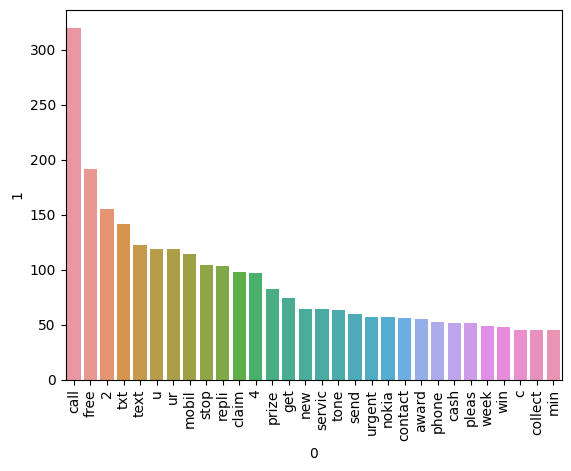

In [39]:

from collections import Counter
h=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
s=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=h,y=s)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['output'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35405

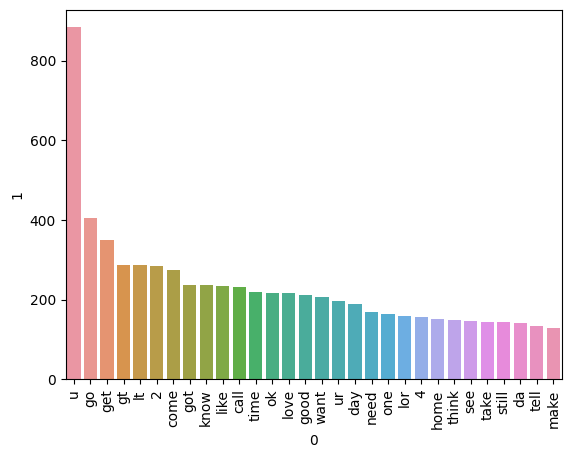

In [41]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#model-building 
& comparing algorithms

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['text']).toarray()

In [43]:
X.shape

(5173, 3000)

In [44]:
y = df['output'].values

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#naive bayes

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8502415458937198
[[771 134]
 [ 21 109]]
0.448559670781893


In [48]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758454106280193
[[904   1]
 [ 24 106]]
0.9906542056074766


In [49]:
# tfidf --> MNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845410628019323
[[903   2]
 [ 14 116]]
0.9830508474576272


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758454106280193, 0.972972972972973)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name,"Accuracy - ",current_accuracy,"Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC Accuracy -  0.9758454106280193 Precision -  0.972972972972973
For  KN Accuracy -  0.9169082125603865 Precision -  0.9782608695652174
For  NB Accuracy -  0.9758454106280193 Precision -  0.9906542056074766
For  DT Accuracy -  0.9429951690821256 Precision -  0.8141592920353983
For  LR Accuracy -  0.9623188405797102 Precision -  0.9504950495049505
For  RF Accuracy -  0.9768115942028985 Precision -  0.9907407407407407
For  AdaBoost Accuracy -  0.9623188405797102 Precision -  0.9252336448598131
For  BgC Accuracy -  0.9671497584541063 Precision -  0.8692307692307693
For  ETC Accuracy -  0.9777777777777777 Precision -  0.9734513274336283
For  GBDT Accuracy -  0.9584541062801932 Precision -  0.9223300970873787
For  xgb Accuracy -  0.9652173913043478 Precision -  0.9051724137931034


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.976812,0.990741
2,NB,0.975845,0.990654
1,KN,0.916908,0.978261
8,ETC,0.977778,0.973451
0,SVC,0.975845,0.972973
4,LR,0.962319,0.950495
6,AdaBoost,0.962319,0.925234
9,GBDT,0.958454,0.922330
10,xgb,0.965217,0.905172
7,BgC,0.967150,0.869231


In [57]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.976812
1,NB,Accuracy,0.975845
2,KN,Accuracy,0.916908
3,ETC,Accuracy,0.977778
4,SVC,Accuracy,0.975845
5,LR,Accuracy,0.962319
6,AdaBoost,Accuracy,0.962319
7,GBDT,Accuracy,0.958454
8,xgb,Accuracy,0.965217
9,BgC,Accuracy,0.967150


C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


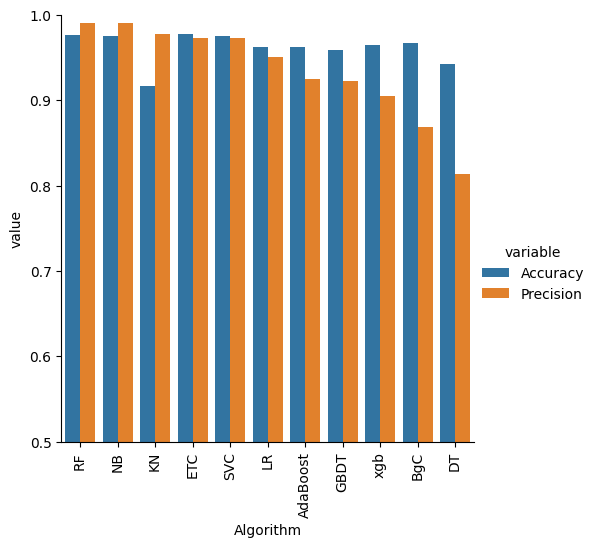

In [58]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [60]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [61]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [62]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [63]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [64]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.976812,0.990741,0.976812,0.990741,0.976812,0.990741,0.976812,0.990741
1,NB,0.975845,0.990654,0.975845,0.990654,0.975845,0.990654,0.975845,0.990654
2,KN,0.916908,0.978261,0.916908,0.978261,0.916908,0.978261,0.916908,0.978261
3,ETC,0.977778,0.973451,0.977778,0.973451,0.977778,0.973451,0.977778,0.973451
4,SVC,0.975845,0.972973,0.975845,0.972973,0.975845,0.972973,0.975845,0.972973
5,LR,0.962319,0.950495,0.962319,0.950495,0.962319,0.950495,0.962319,0.950495
6,AdaBoost,0.962319,0.925234,0.962319,0.925234,0.962319,0.925234,0.962319,0.925234
7,GBDT,0.958454,0.922330,0.958454,0.922330,0.958454,0.922330,0.958454,0.922330
8,xgb,0.965217,0.905172,0.965217,0.905172,0.965217,0.905172,0.965217,0.905172
9,BgC,0.967150,0.869231,0.967150,0.869231,0.967150,0.869231,0.967150,0.869231


In [65]:
# Voting Classifier
rf= RandomForestClassifier(n_estimators= 50, criterion="entropy")
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [66]:
voting = VotingClassifier(estimators=[('rf', rf), ('nb', mnb), ('et', etc),('abc',abc)],voting='soft')


In [67]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=50)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('abc', AdaBoostClassifier(learning_rate=1))],
                 voting='soft')

In [68]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816425120772947
Precision 0.9911504424778761


In [69]:
estimators=[('rf', rf), ('nb', mnb), ('et', etc),('abc',abc)]
final_estimator=RandomForestClassifier()

In [70]:
from sklearn.ensemble import StackingClassifier

In [71]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [72]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806763285024155
Precision 0.9435483870967742


In [73]:
import pickle
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))